In [1]:


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

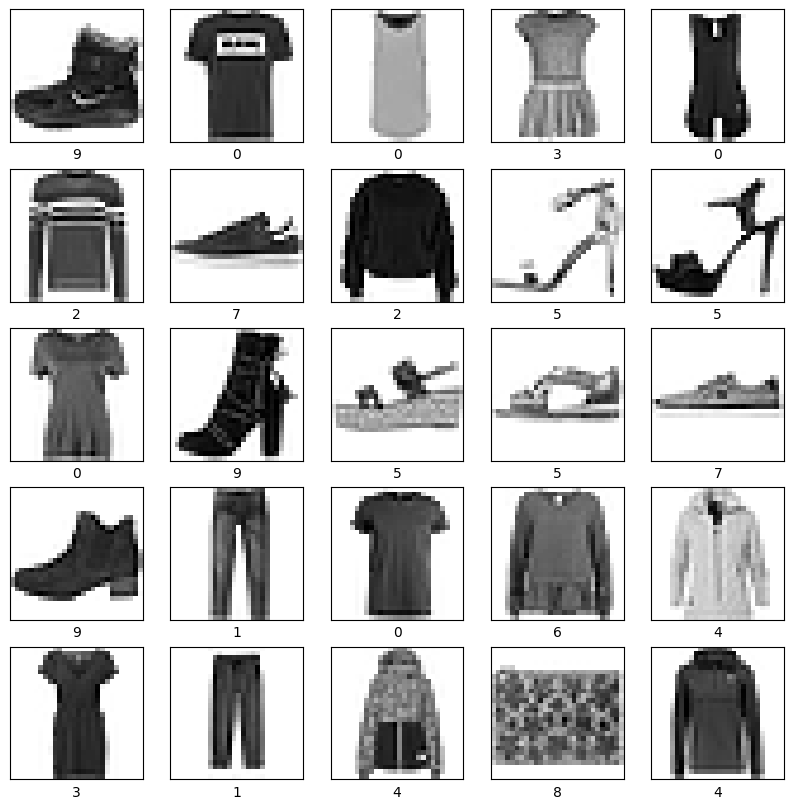

In [2]:
# Нормалізація зображень
train_images = train_images / 255.0
test_images = test_images / 255.0

# Перевірка зображень
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [3]:
from keras.regularizers import l1, l2
# Створення моделі
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Вхідний шар
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # Вихідний шар
])


In [4]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)


In [6]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),batch_size=32, epochs=30, callbacks=[early_stop])


Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4896 - accuracy: 0.8245 - val_loss: 0.4122 - val_accuracy: 0.8502
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8657 - val_loss: 0.3811 - val_accuracy: 0.8615
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3302 - accuracy: 0.8786 - val_loss: 0.3811 - val_accuracy: 0.8587
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8867 - val_loss: 0.4100 - val_accuracy: 0.8467
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.8916 - val_loss: 0.3623 - val_accuracy: 0.8705
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.8971 - val_loss: 0.3395 - val_accuracy: 0.8794
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9003 - val_loss: 0.3390 - val_accuracy:

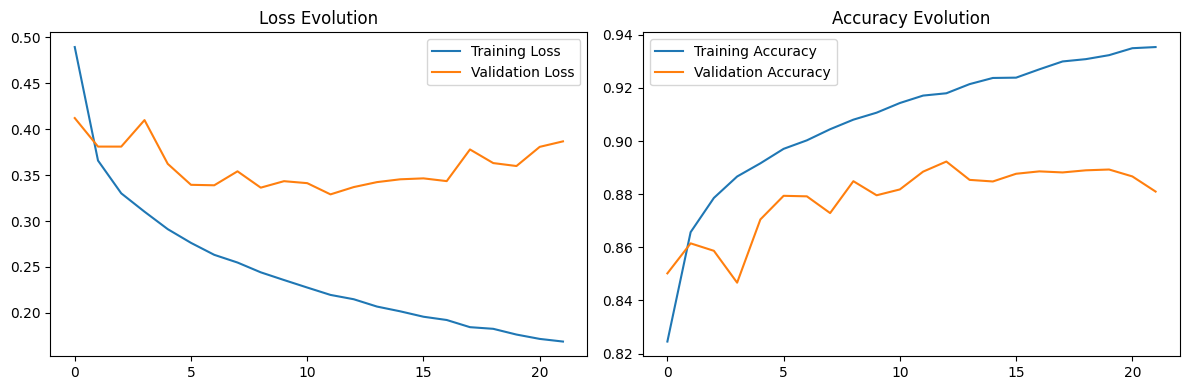

In [7]:
import matplotlib.pyplot as plt

# Втрата
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

# Точність
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8810

Test accuracy: 0.8809999823570251
